<a href="https://colab.research.google.com/github/Data-pageup/deep-learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples : 25000

Example (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25] ...
Label: 1

Padded shape (train): (25000, 200)
Padded shape (test) : (25000, 200)
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded sample review:
 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing


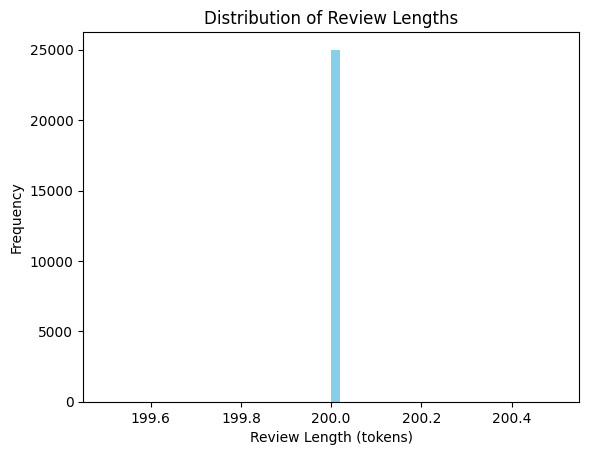

✅ IMDB dataset ready for RNN model.


In [ ]:
# ====== BATCH 1: IMDB RNN DATA LOADING & PREPROCESSING ======
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# --- 1. Load IMDB dataset ---
# num_words=10000 keeps only the 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Testing samples :", len(X_test))

# --- 2. Check an example review (as integer-encoded words) ---
print("\nExample (encoded):", X_train[0][:20], "...")
print("Label:", y_train[0])  # 1=Positive, 0=Negative

# --- 3. Pad sequences ---
# Limit / pad all sequences to maxlen=200 tokens
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

print("\nPadded shape (train):", X_train.shape)
print("Padded shape (test) :", X_test.shape)

# --- 4. Decode some words for understanding ---
word_index = imdb.get_word_index()
reverse_index = {v + 3: k for k, v in word_index.items()}
reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNK>"

decoded_review = " ".join([reverse_index.get(i, "?") for i in X_train[0][:30]])
print("\nDecoded sample review:\n", decoded_review)

# --- 5. Visualize review length distribution ---
lengths = [len(x) for x in X_train]
plt.hist(lengths, bins=50, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (tokens)")
plt.ylabel("Frequency")
plt.show()

print("✅ IMDB dataset ready for RNN model.")


In [ ]:
# ====== BATCH 2: RNN MODEL ARCHITECTURE (IMDB Reviews) ======
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# --- 1. Define parameters ---
vocab_size = 10000   # number of unique words (from data loading)
embedding_dim = 64   # embedding vector size
rnn_units = 128      # number of RNN units
maxlen = 200         # sequence length (from Batch 1)

# --- 2. Define the model architecture ---
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(rnn_units, activation='tanh', return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # Binary classification (Positive/Negative)
])

# --- 3. Compile the model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 61s 291ms/step - accuracy: 0.5011 - loss: 0.7340 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 58s 295ms/step - accuracy: 0.4998 - loss: 0.7247 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 283ms/step - accuracy: 0.5050 - loss: 0.7030 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 316ms/step - accuracy: 0.4974 - loss: 0.6983 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 284ms/step - accuracy: 0.5014 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6932

✅ Test Accuracy: 50.00%
Test Loss: 0.6932


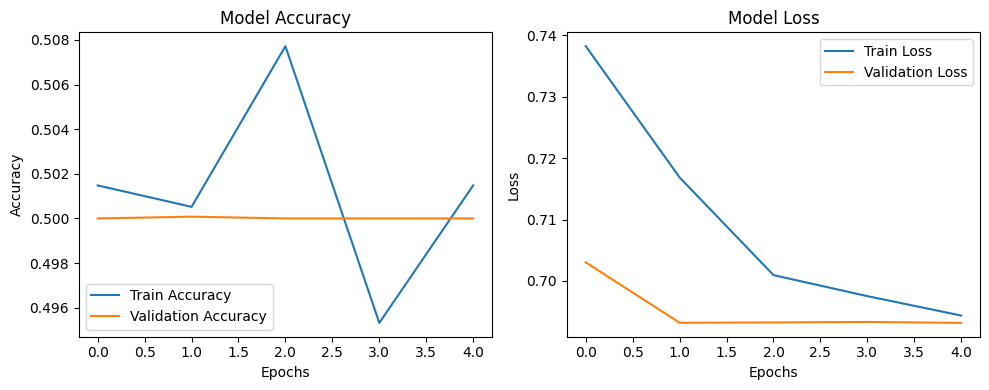

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step


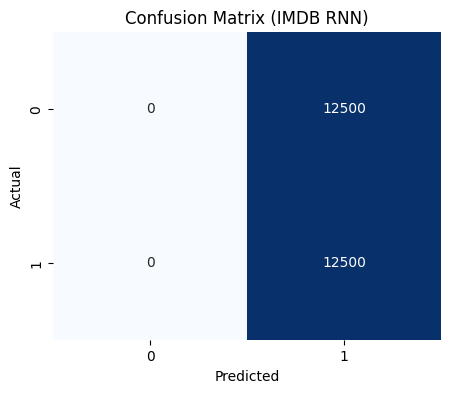


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     12500
    Positive       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ====== BATCH 3: TRAINING + EVALUATION (IMDB RNN) ======
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. Train the model ---
EPOCHS = 5
BATCH_SIZE = 128

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

# --- 2. Evaluate model on test data ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# --- 3. Plot training & validation accuracy/loss ---
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --- 4. Confusion Matrix ---
# Get predictions and convert to 0 or 1
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (IMDB RNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 5. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
# --- 4. Display summary ---
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,019,077 (7.70 MB)

 Trainable params: 673,025 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,052 (5.13 MB)